In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np

In [15]:
user = 'Noga'
if user == 'Noga':
    folder_path = 'C:/Users/nogak/Desktop/MyMaster/YoachimsCourse/files/'
else:
    folder_path = '/Users/amitaylev/Desktop/Amitay/Msc/4th semester/ML_physiological_time_series_analysis/Project/dataset/files.nosync/'

In [16]:
os.listdir(folder_path)[:15]  # Just the first 15 files in the folder

['00735.atr',
 '00735.hea',
 '00735.qrs',
 '03665.atr',
 '03665.hea',
 '03665.qrs',
 '04015.atr',
 '04015.dat',
 '04015.hea',
 '04015.hea-',
 '04015.qrs',
 '04043.atr',
 '04043.dat',
 '04043.hea',
 '04043.hea-']

In [17]:
record_names = []
for file in os.listdir(folder_path):
    if file.endswith('.hea'):  # we find only the .hea files.
        record_names.append(file[:-4])  # we remove the extensions, keeping only the number itself.
print(record_names[:15])
print(f'Number of records: {len(record_names)}')

['00735', '03665', '04015', '04043', '04048', '04126', '04746', '04908', '04936', '05091', '05121', '05261', '06426', '06453', '06995']
Number of records: 25


In [18]:
import wfdb

In [21]:
file_name = folder_path + '04015'  # path of an aribrary file, notice that we do not include the extension (.dat or .hea)

record = wfdb.rdrecord(file_name)

In [20]:
print(record.__dict__)

{'record_name': '04015', 'n_sig': 2, 'fs': 250, 'counter_freq': None, 'base_counter': None, 'sig_len': 9205760, 'base_time': datetime.time(9, 0), 'base_date': None, 'comments': [], 'sig_name': ['ECG1', 'ECG2'], 'p_signal': array([[-0.275, -0.21 ],
       [-0.295, -0.2  ],
       [-0.31 , -0.22 ],
       ...,
       [-0.68 , -1.345],
       [-0.67 , -1.23 ],
       [-0.665, -1.165]]), 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['04015.dat', '04015.dat'], 'fmt': ['212', '212'], 'samps_per_frame': [1, 1], 'skew': [None, None], 'byte_offset': [None, None], 'adc_gain': [200.0, 200.0], 'baseline': [0, 0], 'units': ['mV', 'mV'], 'adc_res': [12, 12], 'adc_zero': [0, 0], 'init_value': [-55, -42], 'checksum': [-27172, -28460], 'block_size': [0, 0]}


In [22]:
print(record.p_signal.shape)

(9205760, 2)


In [23]:
print(f'{record.fs}Hz')

250Hz


In [24]:
signals, fields = wfdb.rdsamp(file_name)
print(signals)
print(fields)

[[-0.275 -0.21 ]
 [-0.295 -0.2  ]
 [-0.31  -0.22 ]
 ...
 [-0.68  -1.345]
 [-0.67  -1.23 ]
 [-0.665 -1.165]]
{'fs': 250, 'sig_len': 9205760, 'n_sig': 2, 'base_date': None, 'base_time': datetime.time(9, 0), 'units': ['mV', 'mV'], 'sig_name': ['ECG1', 'ECG2'], 'comments': []}


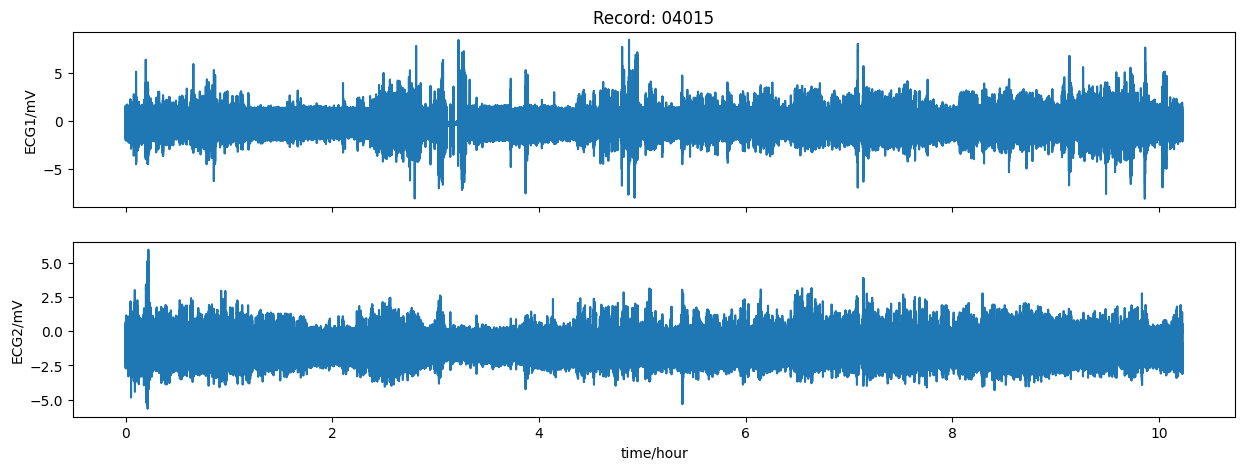

In [32]:
figsize=(15,5)

wfdb.plot_wfdb(record=record, time_units='hours', figsize=figsize)

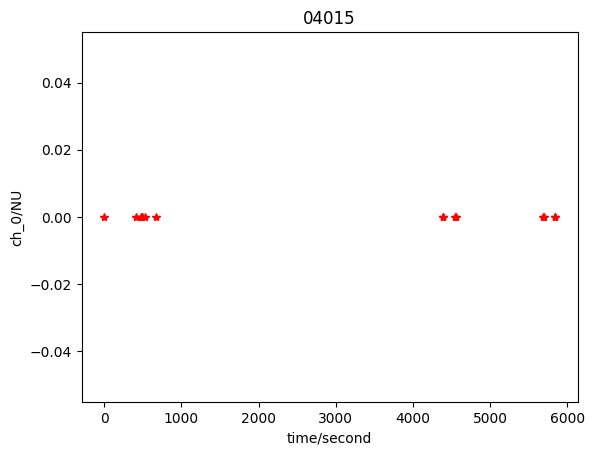

dict_keys(['record_name', 'extension', 'sample', 'symbol', 'subtype', 'chan', 'num', 'aux_note', 'fs', 'label_store', 'description', 'custom_labels', 'contained_labels', 'ann_len'])

In [33]:
annotation = wfdb.rdann(file_name, 'atr')
wfdb.plot_wfdb(annotation=annotation, time_units='seconds')
annotation.__dict__.keys()

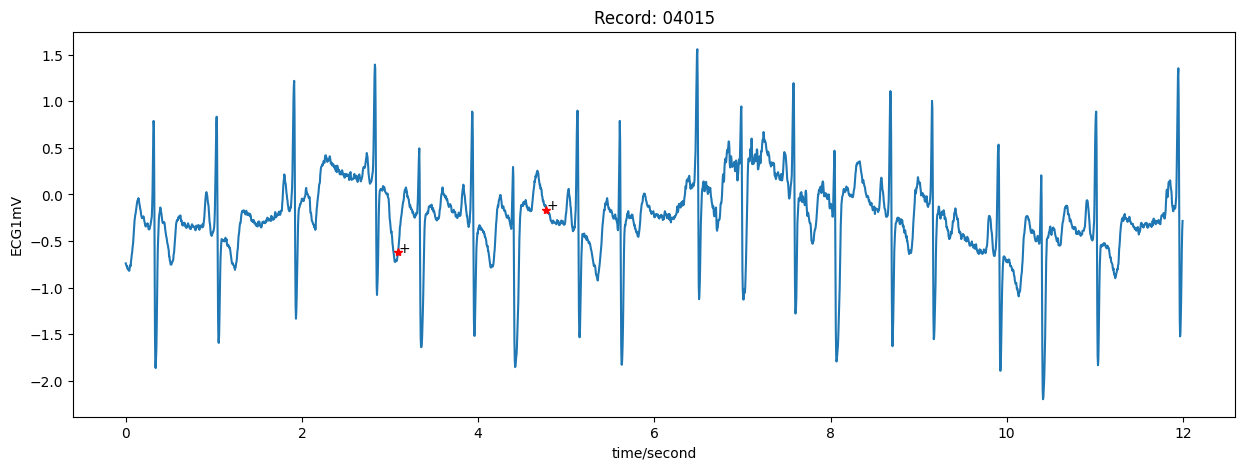

In [34]:
sampfrom=121000
sampto=124000

record_samples = wfdb.rdrecord(file_name, sampfrom=sampfrom, sampto=sampto, channels=[0])
annotation_samples = wfdb.rdann(file_name, 'atr', sampfrom=sampfrom, sampto=sampto, shift_samps=True)
wfdb.plot_wfdb(record=record_samples, annotation=annotation_samples, plot_sym=True, time_units='seconds',  figsize=figsize)

In [35]:
from wfdb import processing

In [44]:
signal = np.squeeze(record_samples.p_signal)
fs = record_samples.fs

# Compute XQRS:
xqrs_inds = processing.xqrs_detect(signal, fs)
print(f'\nXQRS results:\n{xqrs_inds}')

# Compute GQRS:
gqrs_inds = processing.gqrs_detect(signal, fs)
print(f'\nGQRS results:\n{gqrs_inds}')

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.

XQRS results:
[  86  256  476  706  840  982 1107 1280 1409 1620 1755 1902 2020 2169
 2295 2475 2605 2752 2994]

GQRS results:
[  78  248  468  698  832  974 1099 1272 1400 1612 1746 1893 2011 2161
 2287 2467 2597 2744]


In [36]:
# Plot
# Define a function for later use:
def plot_detectors(signal, fs, xqrs_inds, gqrs_inds, annotation_samples, title=''):
    t = np.linspace(0, (signal.shape[0]-1)/fs, signal.shape[0])
    plt.plot(t, signal,'c')
    plt.plot(t[xqrs_inds], signal[xqrs_inds], 'om', markersize=4, label='XQRS')
    plt.plot(t[gqrs_inds], signal[gqrs_inds], '+r', label='GQRS')
    for i, symbol in enumerate(annotation_samples.symbol):
        plt.annotate(symbol, (t[annotation_samples.sample][i], signal[annotation_samples.sample][i]))
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude (mV)')
    plt.title(title)
    plt.legend()

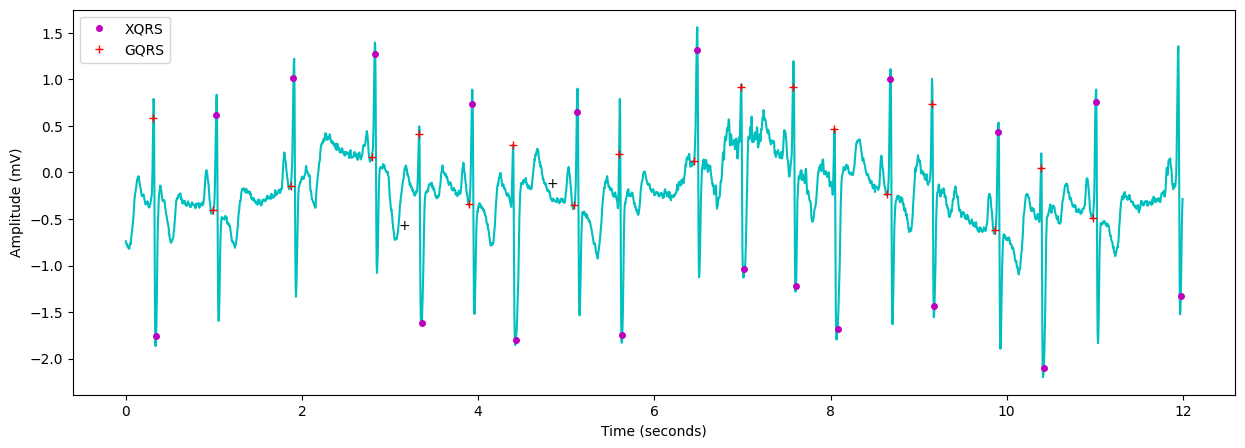

In [37]:
plt.figure(figsize=figsize)
plot_detectors(signal, fs, xqrs_inds, gqrs_inds, annotation_samples)
plt.show()

11-hour single channel holter ECG:


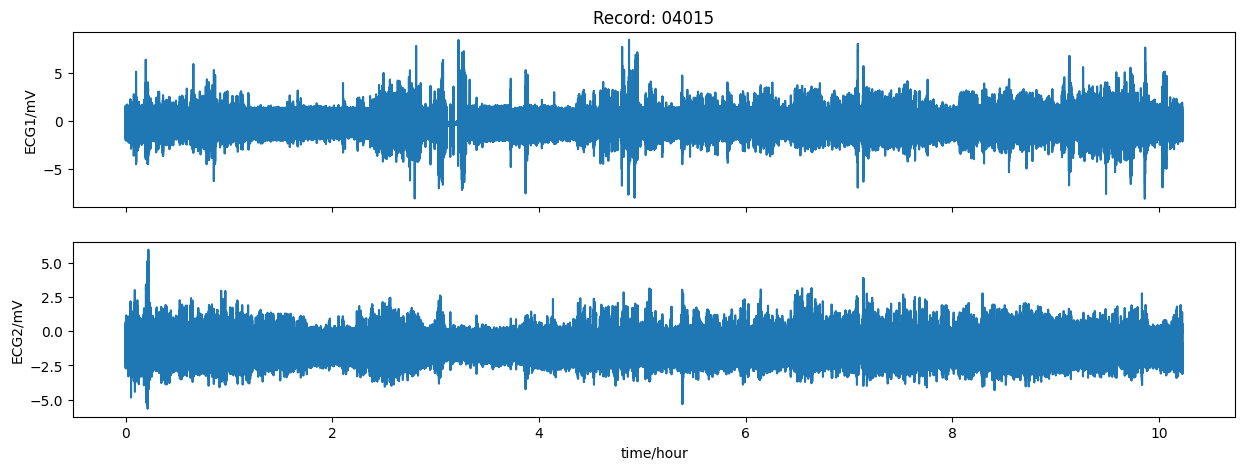

In [38]:
record0 = wfdb.rdrecord(file_name, channels=[0,1])
print('11-hour single channel holter ECG:')
wfdb.plot_wfdb(record=record0, time_units='hours', figsize=figsize)

In [39]:
from scipy.fft import fft, fftfreq

#--------------Your code--------------#
# S should be the FFT.
# k should be the discrete sample frequencies.

k = fftfreq(len(signal), 1/fs)
S = fft(signal)
#-------------------------------------#

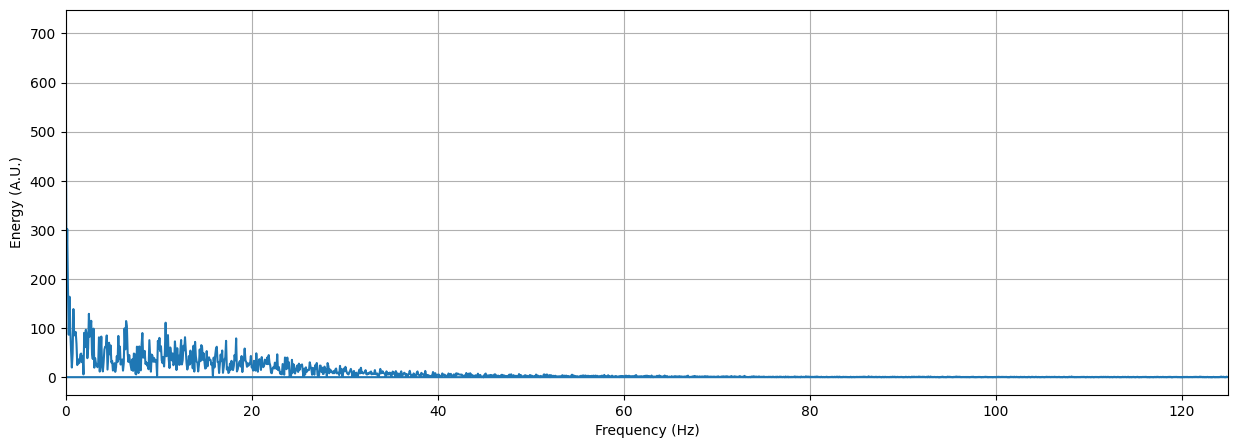

In [40]:
plt.figure(figsize=(15,5))
plt.plot(k, abs(S))
plt.xlim(0, fs/2)
plt.grid()
plt.ylabel('Energy (A.U.)')
plt.xlabel('Frequency (Hz)')
plt.show()

In [41]:
### from scipy.fft import ifft
from scipy.signal import butter, filtfilt  # Butterworth filter

#--------------Your code--------------#
# signal_LP10 and signal_LP30 should be the filtered signals.

b, a = butter(4, 10, 'low', fs=fs)
signal_LP10 = filtfilt(b, a, signal)  # Notice the zero-phase filtering

b, a = butter(4, 30, 'low', fs=fs)
signal_LP30 = filtfilt(b, a, signal)
#-------------------------------------#

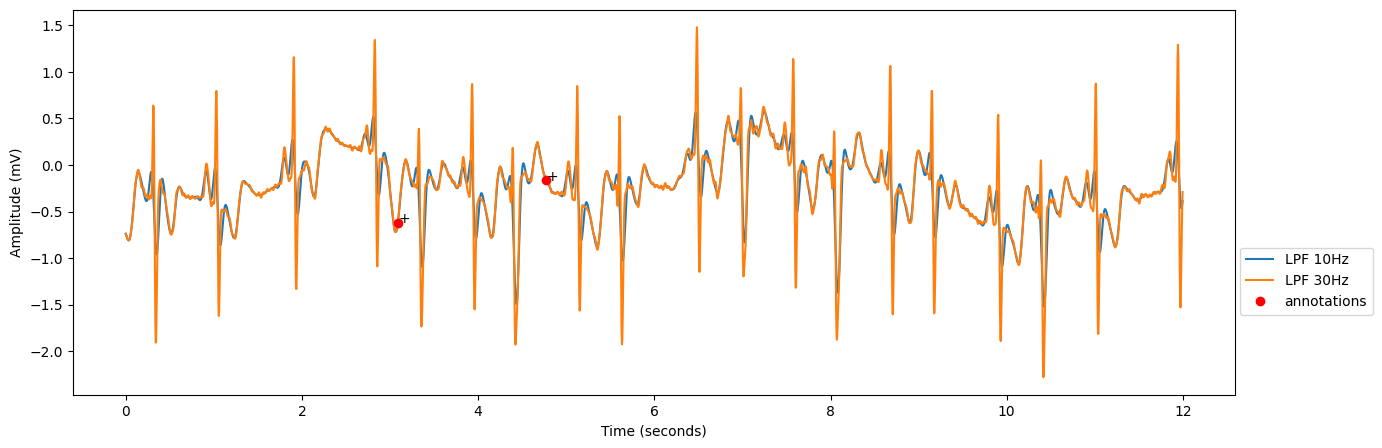

In [43]:
plt.figure(figsize=(15,5))
t = np.linspace(0, (signal.shape[0]-1)/fs, signal.shape[0])
# plt.plot(t, signal, label='original')
plt.plot(t, signal_LP10, label='LPF 10Hz')
plt.plot(t, signal_LP30, label='LPF 30Hz')
plt.plot(t[annotation_samples.sample], signal[annotation_samples.sample], 'or', label='annotations')
for i, symbol in enumerate(annotation_samples.symbol):
    plt.annotate(symbol, (t[annotation_samples.sample][i], signal[annotation_samples.sample][i]))
#plt.xlim(31.5,34)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (mV)')
plt.legend(bbox_to_anchor=(1.124, 0.4))
plt.show()

In [46]:
def rsqi(signal , fs):
    
    #--------------Your code--------------#
    # Compute XQRS:
    xqrs_inds = processing.xqrs_detect(signal, fs, verbose=False)

    # Compute GQRS:
    gqrs_inds = processing.gqrs_detect(signal, fs)
    
    # Compute ratio:
    len_XQRS = len(xqrs_inds)
    len_GQRS = len(gqrs_inds)
    N = min(len_XQRS, len_GQRS)
    D = max(len_XQRS, len_GQRS)
    if N==0:
        rsqi = 0
    else:
        rsqi = N/D
    #-------------------------------------#
    
    return rsqi, xqrs_inds, gqrs_inds

In [47]:
print(f'rSQI is {rsqi(signal , fs)[0]}')

rSQI is 0.9473684210526315


In [48]:
from pecg import Preprocessing as Pre

def bsqi(signal , fs):  
    xqrs_inds = processing.xqrs_detect(signal, fs, verbose=False)
    gqrs_inds = processing.gqrs_detect(signal, fs)
    pre_pecg = Pre.Preprocessing(signal, fs)
    bsqi = pre_pecg.bsqi(xqrs_inds, gqrs_inds)   
    return bsqi, xqrs_inds, gqrs_inds

In [49]:
def show_sqi_example(file_name, sampfrom, sampto, title='', sqi='r', plot=True):
    record_samples = wfdb.rdrecord(file_name, sampfrom=sampfrom, sampto=sampto, channels=[0])
    
    signal = np.squeeze(record_samples.p_signal)
    fs = record_samples.fs
    
    annotation_samples = wfdb.rdann(file_name, 'atr', sampfrom=sampfrom, sampto=sampto-1, shift_samps=True)  # rdrecord and rdann uses sampto differently, thus a -1
    
    if sqi=='r':
        sqi_result, xqrs_inds, gqrs_inds = rsqi(signal , fs)
    elif sqi=='b':
        sqi_result, xqrs_inds, gqrs_inds = bsqi(signal , fs)
    else:
        raise Exception(f'Implement me! {sqi}sqi..')
    
    if plot:
        plot_detectors(signal, fs, xqrs_inds, gqrs_inds, annotation_samples,title=title + ': ' + sqi + f'SQI={round(sqi_result,3)}')
    return sqi_result

In [50]:
def process_sqi(record_ind, fs, hour, minute, second, sqi='r', window_time=10, section_duration=30):
    
    file_name = folder_path + record_ind
    
    # Define where to start reading:
    start_time = hour*3600 + minute*60 + second
    sampfrom = start_time*fs
    duration = section_duration*60*fs  # half a hour by default
    sampto = sampfrom + duration

    # Define the window:
    window_size = window_time*fs
    windows = int(np.floor((sampto-sampfrom)/window_size))  # numnber of windows

    sqi_vec = []
    for i in range(windows):
        sampfrom_w = sampfrom + i*window_size
        sampto_w = sampfrom + (i+1)*window_size
        sqi_result = show_sqi_example(file_name, sampfrom_w, sampto_w, title='', sqi=sqi, plot=False)
        sqi_vec.append(sqi_result)
    
    # Show histogram
    plt.figure()
    plt.hist(sqi_vec, bins=50)
    plt.xlabel(sqi+'sqi')
    plt.show()
    return sqi_vec, sampfrom, window_size

In [51]:
def plot_representatives(record_ind, sqi_vec, sampfrom, window_size, sqi='r', examples=10, subplot_size=(3,4)):    
    
    file_name = folder_path + record_ind
    
    # Create a list of sqi values to print:
    min_sqi = np.min(sqi_vec)
    max_sqi = np.max(sqi_vec)
    chosens = np.linspace(min_sqi, max_sqi, examples)
    
    sqi_vec_copy = sqi_vec.copy()
    
    plt.figure(figsize=(18,10))
    
    for i, chosen in enumerate(chosens):
        
        # Serach for the closest possible value in the list:
        ind = np.argmin(np.abs(chosen-sqi_vec_copy))
        sqi_vec_copy[ind] = 2  # avoid repeating at the next iteration
        
        # Select the corresponding window:
        sampfrom_w = sampfrom + ind*window_size
        sampto_w = sampfrom + (ind+1)*window_size
        
        # Plot
        plt.subplot(subplot_size[0], subplot_size[1], i+1)
        sqi_result = show_sqi_example(file_name, sampfrom_w, sampto_w, title='', sqi=sqi, plot=True)
        
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.show()

In [52]:
example1_param = ('04043',0,0,0)
example2_param = ('04048',1,0,0)

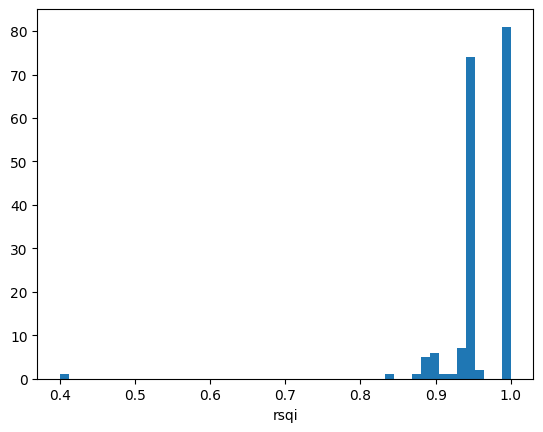

In [53]:
#Example 1 with rSQI:
record_ind, hour, minute, second = example1_param

sqi_vec, sampfrom, window_size = process_sqi(record_ind, fs, hour, minute, second, sqi='r')

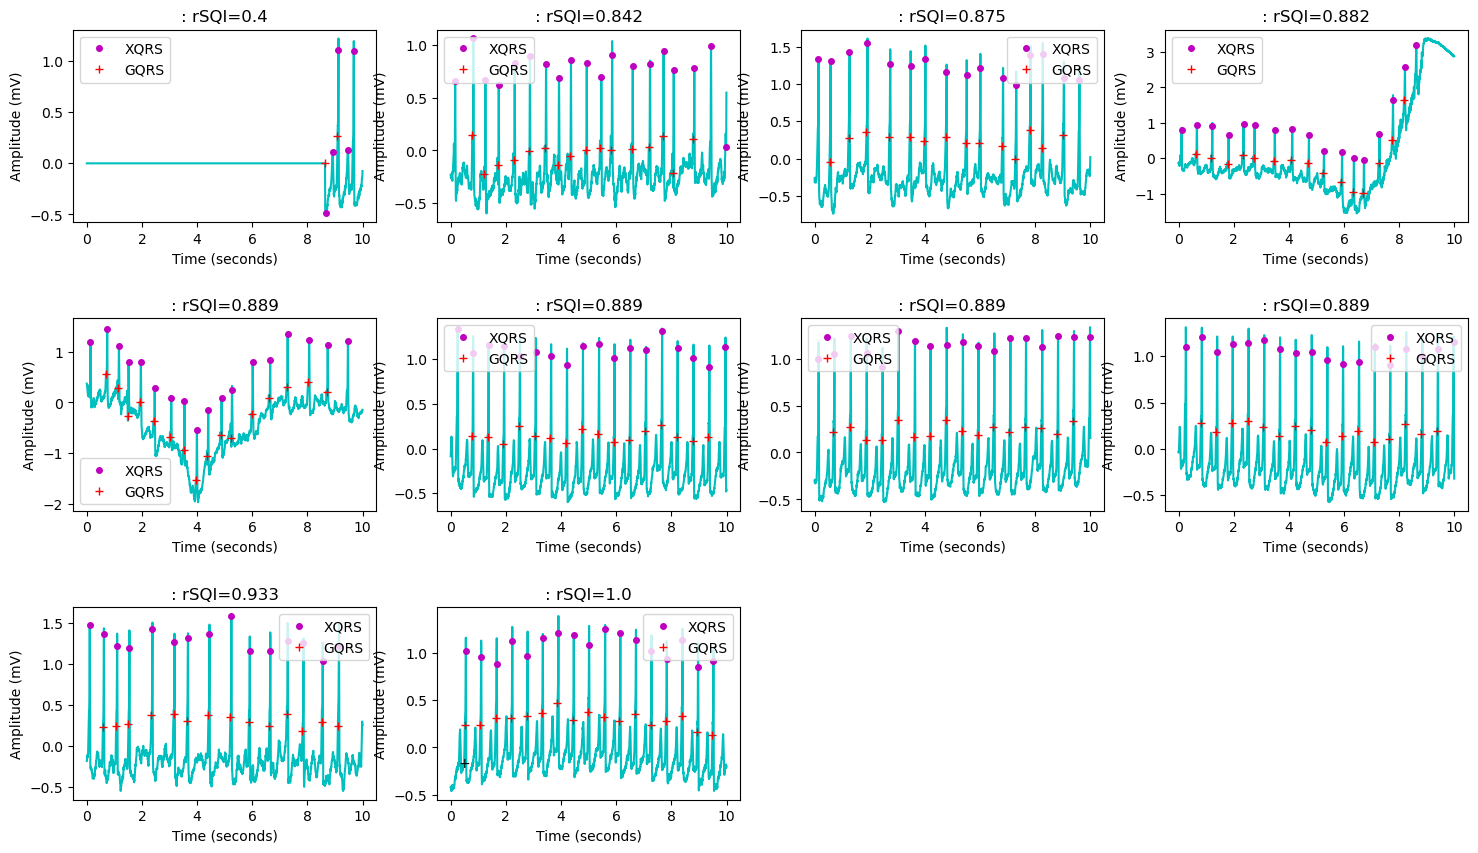

In [65]:
plot_representatives(record_ind, sqi_vec, sampfrom, window_size, sqi='r')

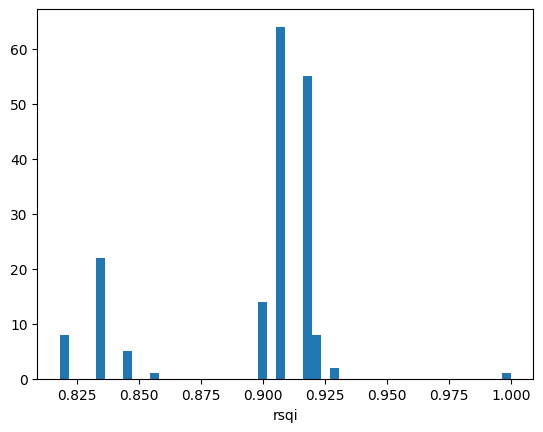

In [54]:
#Example 2 with rSQI:
record_ind, hour, minute, second = example2_param

sqi_vec, sampfrom, window_size = process_sqi(record_ind, fs, hour, minute, second, sqi='r')

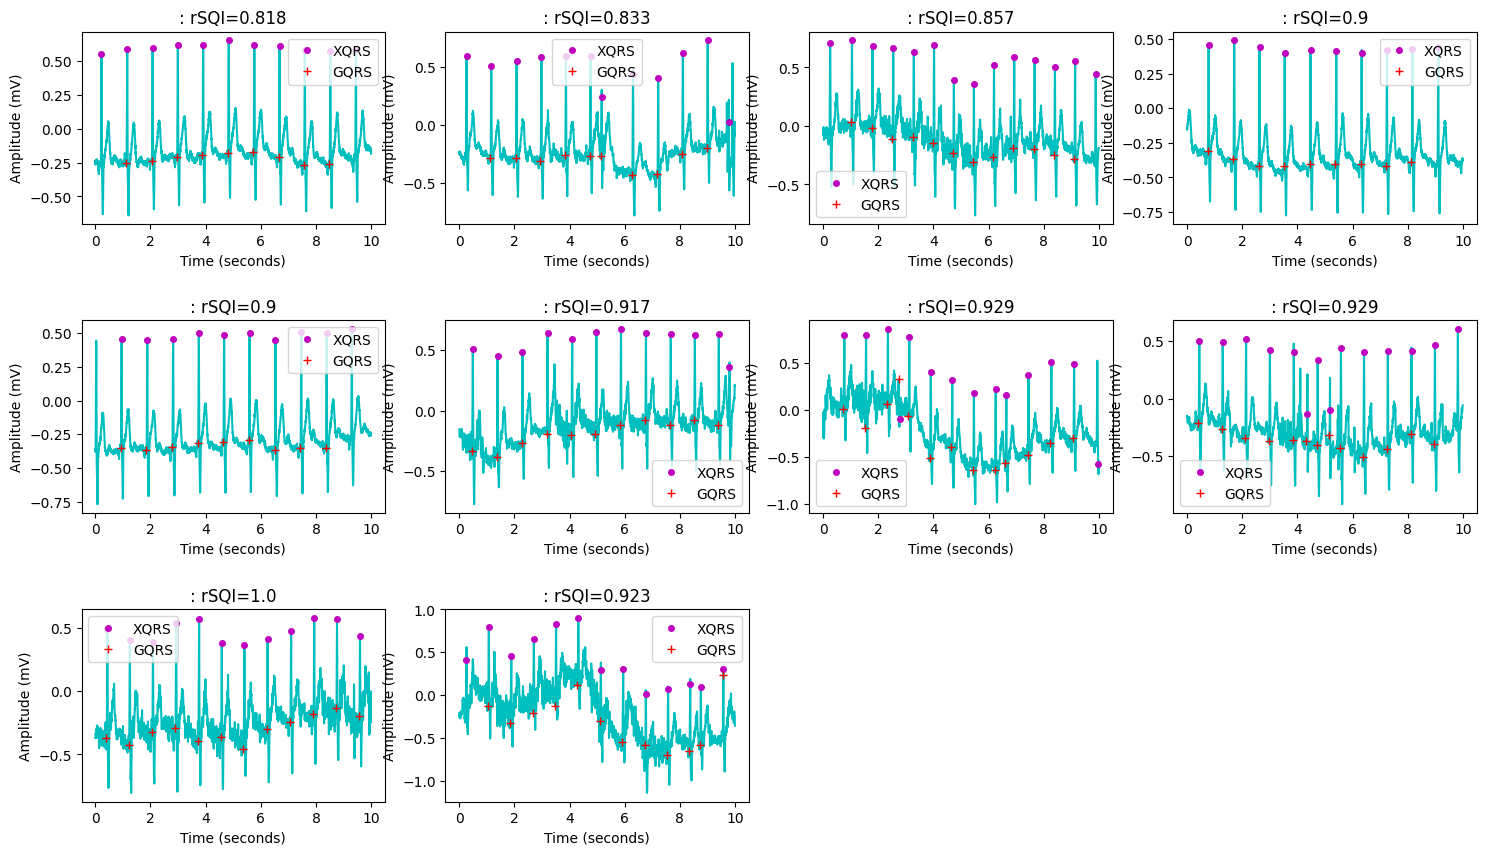

In [55]:
plot_representatives(record_ind, sqi_vec, sampfrom, window_size, sqi='r')

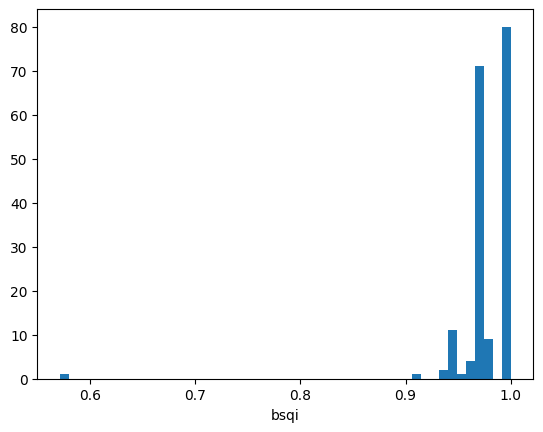

In [56]:
#Example 1 with bSQI:
record_ind, hour, minute, second = example1_param

sqi_vec, sampfrom, window_size = process_sqi(record_ind, fs, hour, minute, second, sqi='b')

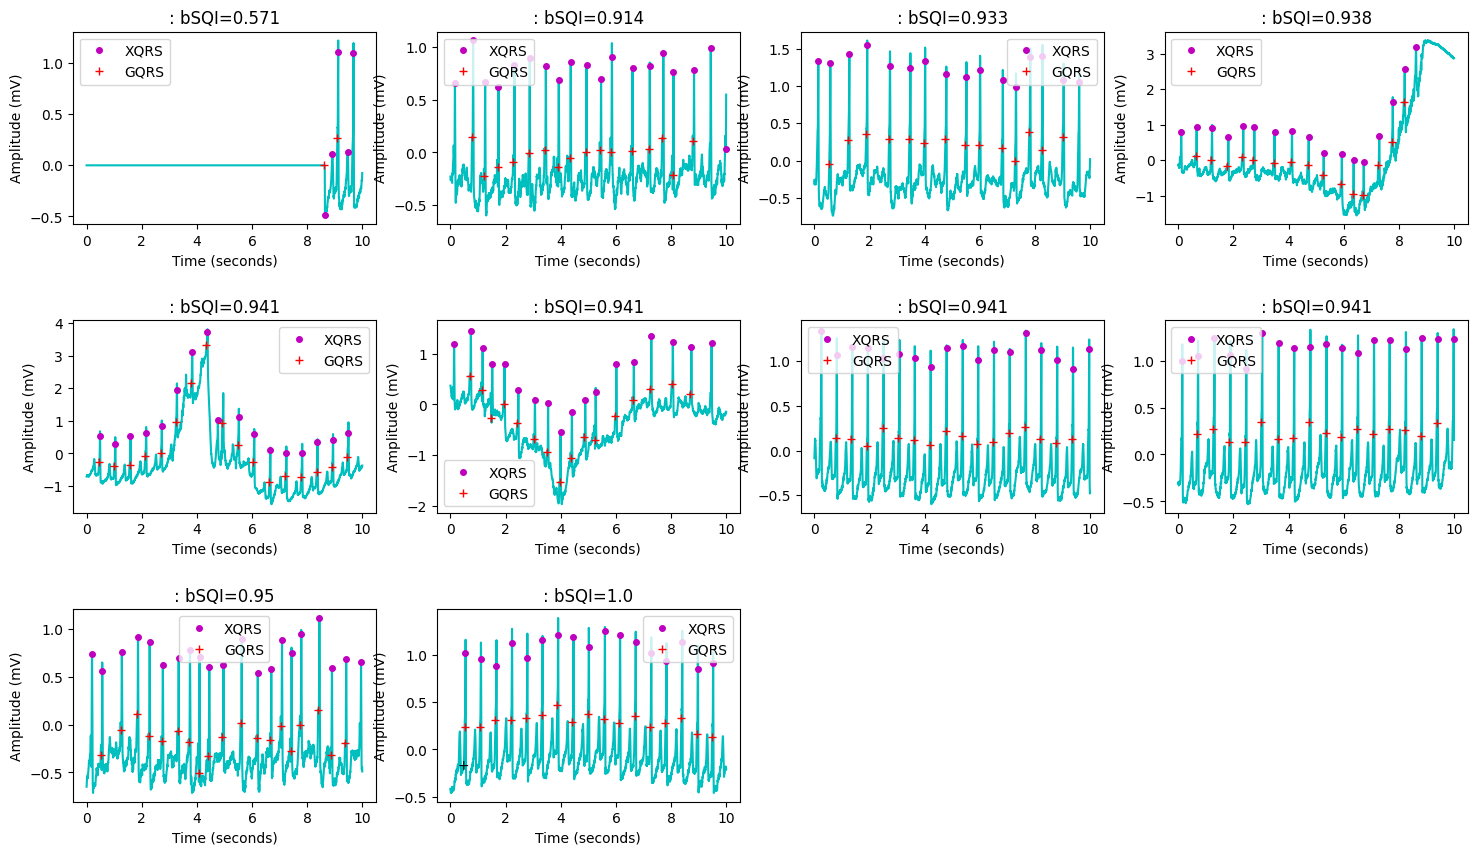

In [57]:
plot_representatives(record_ind, sqi_vec, sampfrom, window_size, sqi='b')

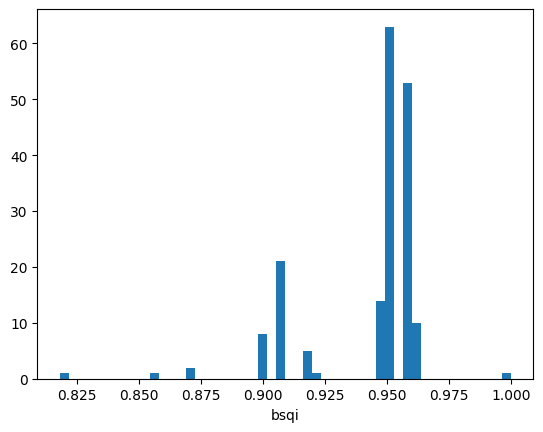

In [58]:
#Example 2 with bSQI:
record_ind, hour, minute, second = example2_param

sqi_vec, sampfrom, window_size = process_sqi(record_ind, fs, hour, minute, second, sqi='b')

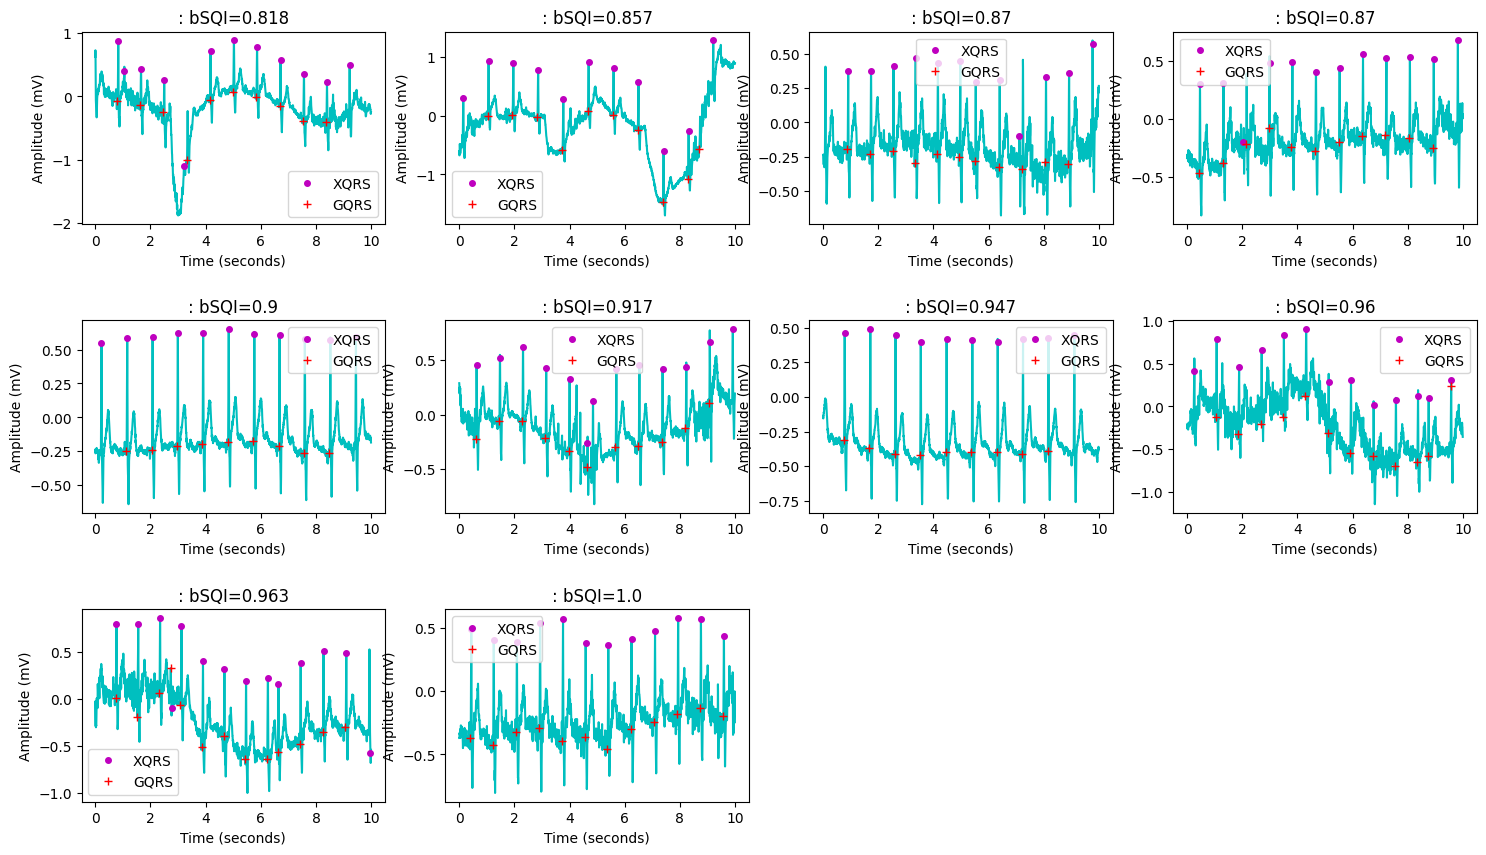

In [59]:
plot_representatives(record_ind, sqi_vec, sampfrom, window_size, sqi='b')

In [60]:
record_number = file_name.split('/')[-1]

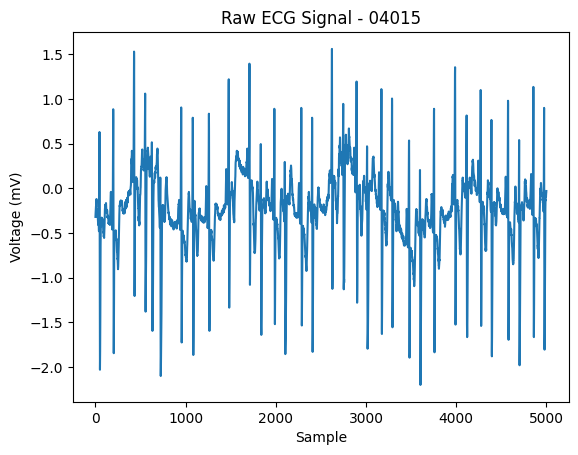

IndexError: index 121773 is out of bounds for axis 0 with size 5000

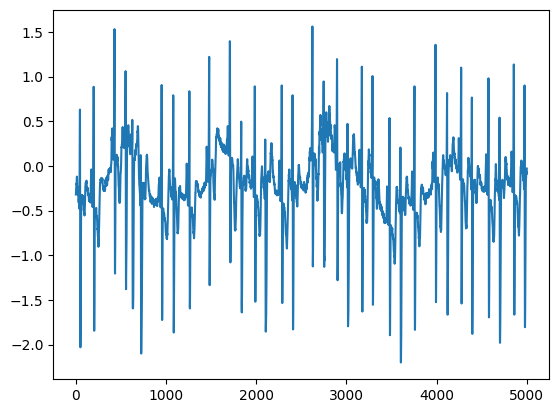

In [61]:
import wfdb
import matplotlib.pyplot as plt

s_from=120000
# Download the dataset and annotations
record = wfdb.rdrecord(file_name, sampfrom=s_from, sampto=s_from+5000, channels=[0])
annotation = wfdb.rdann(file_name, 'atr', sampfrom=s_from, sampto=s_from+5000)

# Plot the raw ECG signal
plt.plot(record.p_signal)
plt.title(f'Raw ECG Signal - {record_number}')
plt.xlabel('Sample')
plt.ylabel('Voltage (mV)')
plt.show()

# Plot the ECG signal with annotations
plt.plot(record.p_signal)
plt.plot(annotation.sample, record.p_signal[annotation.sample], 'rx')
plt.title(f'ECG Signal with AF Annotations - {record_number}')
plt.xlabel('Sample')
plt.ylabel('Voltage (mV)')
plt.show()
